# Data Preparation for Idiom-Aware Translation

This notebook processes the raw Excel dataset containing English-Sinhala idiom pairs and prepares it for model training.

## Steps:
1. Load the Excel dataset
2. Validate data quality
3. Split into train/test sets (first 50 rows for testing)
4. Tag idioms with `<IDIOM>` markers
5. Export to JSON format
6. Display statistics and visualizations

In [1]:
import sys
sys.path.append('..')

from src.data_processor import (
    load_excel,
    validate_data,
    split_data,
    convert_to_json_format,
    export_to_json,
    process_dataset
)
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_colwidth', 100)
sns.set_style('whitegrid')

print("✓ Imports successful")

✓ Imports successful


## 1. Load and Explore Raw Data

In [2]:
# Load the Excel file
excel_path = '../data/raw/idiom_dataset.xlsx'
df = load_excel(excel_path)

# Display basic information
print(f"\nDataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Show first few rows
df.head()

✓ Loaded 510 rows from ../data/raw/idiom_dataset.xlsx

Dataset shape: (510, 6)
Columns: ['Sinhala Idiom', 'English Idiom', 'What It Means', 'Figurative Example', 'Sinhala Translation Example', 'Evaluation']


,Sinhala Idiom,English Idiom,What It Means,Figurative Example,Sinhala Translation Example,Evaluation
0,අයනු ආයනු,A.B.C,"Something is very easy, simple, or requires little effort",He doesn't know even the A. B. C. of literary\ncriticism.,සාහිත්‍ය විවේචනයේ අයන්න වත් ඔහු නොදනියි.\n,Yes
1,අත් හිටලා,In abeyance,a state of not happening or being used at present,That matter has now been in abeyance for a\nnumber of years.,ඒ කරුණ දැන් අවුරුදු ගණනකට අත් හිටලාය.,Yes
2,වෙන කිසිත් නැතත්,Above all,more so than anything else,"Above all, be truthful.","වෙන කිසිත් නැතත්, සත්‍යවාදී වනු.",Yes
3,සඟවන්න්ට දෙයක් නැති,Above-board,"legitimate, honest, and open",His conduct has been entirely above-board.,ඔහුගේ හැසිරීම පිළිබඳව සැක කිරීමට හේතුවක් නැත.,Yes
4,ආක්‍රෝශ පරිසව - වචන,Terms of abuse,an unkind or unpleasant name to call someone,He constantly addressed her in terms of abuse.,ඔහු නිරන්තරයෙන් ඇයට ආක්‍රෝශ පරිභව වචනයෙන්\nකථා කළේය.,Yes


## 2. Data Validation

In [3]:
# Validate data quality
stats = validate_data(df)

print("\n=== Data Quality Report ===")
print(f"Total rows: {stats['total_rows']}")
print(f"\nMissing values per column:")
for col, count in stats['missing_values'].items():
    if count > 0:
        print(f"  {col}: {count}")

if stats['evaluation_counts']:
    print(f"\nEvaluation status:")
    for status, count in stats['evaluation_counts'].items():
        print(f"  {status}: {count}")


=== Data Quality Report ===
Total rows: 510

Missing values per column:
  What It Means: 1
  Evaluation: 460

Evaluation status:
  Yes: 50


## 3. Process and Split Dataset

In [4]:
# Process the full dataset
output_dir = '../data/processed'
test_size = 50

processing_stats = process_dataset(
    excel_path=excel_path,
    output_dir=output_dir,
    test_size=test_size
)

print("\n=== Processing Complete ===")
print(f"Training examples: {processing_stats['train_examples']}")
print(f"Test examples: {processing_stats['test_examples']}")
print(f"\nOutput files:")
for key, path in processing_stats['output_files'].items():
    print(f"  {key}: {path}")

✓ Loaded 510 rows from ../data/raw/idiom_dataset.xlsx
✓ Split data: 460 train, 50 test
⚠ Warning: Could not find idiom 'Open the ball' in sentence: The magistrate opened the ball by asking the
polic...
⚠ Warning: Could not find idiom 'Bark up the wrong tree' in sentence: If you think I was responsible for your dismissal ...
⚠ Warning: Could not find idiom 'A battle royal' in sentence: When I entered the school, there was a battle
roya...
⚠ Warning: Could not find idiom 'Be no more' in sentence: Our poor old dog is no more....
⚠ Warning: Could not find idiom 'Like a bear-garden' in sentence: When I entered the class room it looked like a
bea...
⚠ Warning: Could not find idiom 'Beat about the bush' in sentence: Tell me plainly what you came here for, without
be...
⚠ Warning: Could not find idiom 'Be dead beat' in sentence: After walking all day in the rain we were dead
bea...
⚠ Warning: Could not find idiom 'Beggar description' in sentence: The splendour of the Coronation beggars
descrip

## 4. Inspect Processed Data

In [5]:
# Load and display sample processed data
with open('../data/processed/test.json', 'r', encoding='utf-8') as f:
    test_data = json.load(f)

print("Sample test example:")
print(json.dumps(test_data[0], indent=2, ensure_ascii=False))

# Verify idiom tagging
print("\n=== Idiom Tagging Examples ===")
for i, example in enumerate(test_data[:3]):
    print(f"\nExample {i+1}:")
    print(f"Idiom: {example['idiom_en']}")
    print(f"Source: {example['source_en'][:100]}...")
    print(f"Tagged: {'<IDIOM>' in example['source_en']}")

Sample test example:
{
  "idiom_en": "A.B.C",
  "idiom_si": "අයනු ආයනු",
  "meaning": "Something is very easy, simple, or requires little effort",
  "source_en": "He doesn't know even the A. B. C. of literary\ncriticism.",
  "target_si": "සාහිත්‍ය විවේචනයේ අයන්න වත් ඔහු නොදනියි.",
  "evaluation": "Yes"
}

=== Idiom Tagging Examples ===

Example 1:
Idiom: A.B.C
Source: He doesn't know even the A. B. C. of literary
criticism....
Tagged: False

Example 2:
Idiom: In abeyance
Source: That matter has now been <IDIOM>in abeyance</IDIOM> for a
number of years....
Tagged: True

Example 3:
Idiom: Above all
Source: <IDIOM>Above all</IDIOM>, be truthful....
Tagged: True


## 5. Statistics and Visualizations

In [6]:
# Load training data for analysis
with open('../data/processed/train.json', 'r', encoding='utf-8') as f:
    train_data = json.load(f)

# Calculate statistics
total_idioms = len(set([ex['idiom_en'] for ex in train_data + test_data]))
validation_yes = len([ex for ex in train_data + test_data if ex['evaluation'] == 'Yes'])

print("=== Dataset Statistics ===")
print(f"Total unique idioms: {total_idioms}")
print(f"Training examples: {len(train_data)}")
print(f"Test examples: {len(test_data)}")
print(f"Validated examples: {validation_yes}")
print(f"Validation rate: {validation_yes / (len(train_data) + len(test_data)) * 100:.1f}%")

=== Dataset Statistics ===
Total unique idioms: 491
Training examples: 460
Test examples: 50
Validated examples: 50
Validation rate: 9.8%


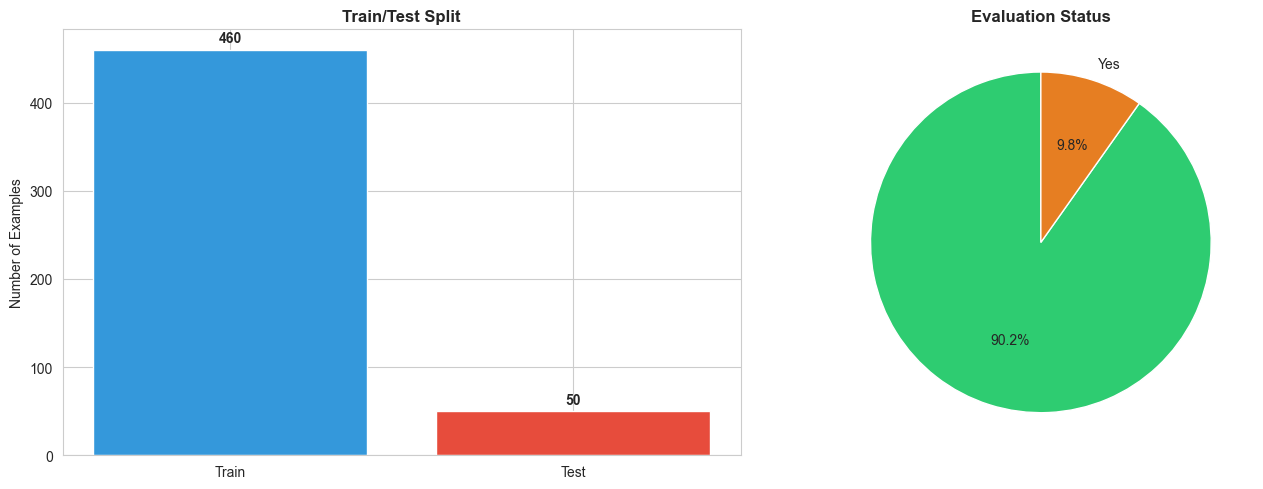

✓ Visualization saved to outputs/data_statistics.png


In [7]:
# Visualize data distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Dataset split
split_data_viz = pd.DataFrame({
    'Split': ['Train', 'Test'],
    'Count': [len(train_data), len(test_data)]
})
axes[0].bar(split_data_viz['Split'], split_data_viz['Count'], color=['#3498db', '#e74c3c'])
axes[0].set_title('Train/Test Split', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Examples')
for i, v in enumerate(split_data_viz['Count']):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# Evaluation status
eval_counts = pd.Series([ex['evaluation'] for ex in train_data + test_data]).value_counts()
axes[1].pie(eval_counts.values, labels=eval_counts.index, autopct='%1.1f%%', 
            colors=['#2ecc71', '#e67e22'], startangle=90)
axes[1].set_title('Evaluation Status', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/data_statistics.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Visualization saved to outputs/data_statistics.png")

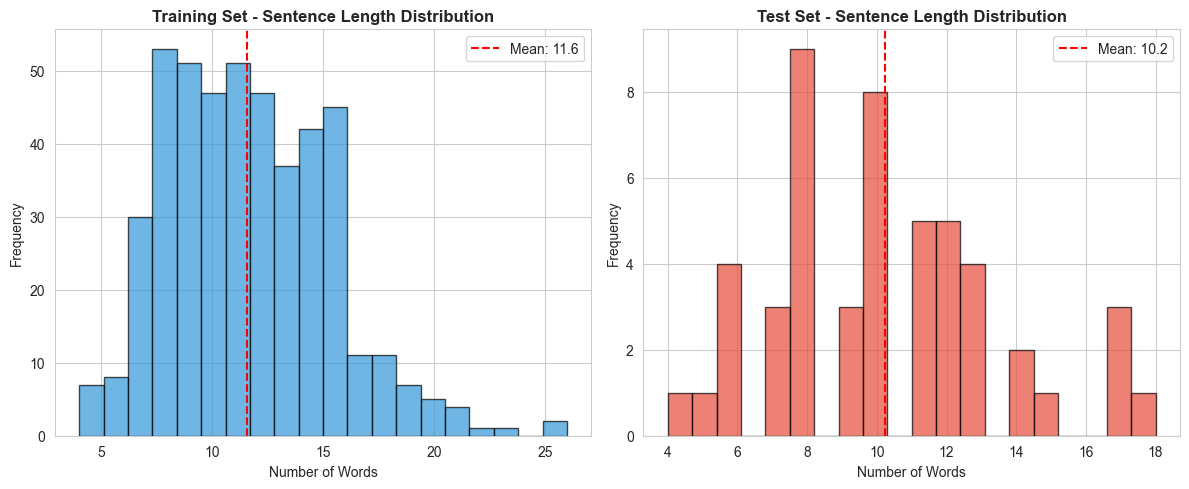

✓ Visualization saved to outputs/sentence_length_distribution.png


In [8]:
# Analyze sentence lengths
train_lengths = [len(ex['source_en'].split()) for ex in train_data]
test_lengths = [len(ex['source_en'].split()) for ex in test_data]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(train_lengths, bins=20, alpha=0.7, color='#3498db', edgecolor='black')
plt.title('Training Set - Sentence Length Distribution', fontweight='bold')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.axvline(sum(train_lengths)/len(train_lengths), color='red', linestyle='--', 
            label=f'Mean: {sum(train_lengths)/len(train_lengths):.1f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(test_lengths, bins=20, alpha=0.7, color='#e74c3c', edgecolor='black')
plt.title('Test Set - Sentence Length Distribution', fontweight='bold')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.axvline(sum(test_lengths)/len(test_lengths), color='red', linestyle='--',
            label=f'Mean: {sum(test_lengths)/len(test_lengths):.1f}')
plt.legend()

plt.tight_layout()
plt.savefig('../outputs/sentence_length_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Visualization saved to outputs/sentence_length_distribution.png")

## 6. Summary

Data preparation completed successfully! The dataset has been:
- ✅ Loaded and validated
- ✅ Split into train and test sets
- ✅ Idioms tagged with `<IDIOM>` markers
- ✅ Exported to JSON format
- ✅ Statistics calculated and visualized

**Next Step**: Run `02_data_augmentation.ipynb` to create augmented training examples.